<a href="https://colab.research.google.com/github/rahiakela/probabilistic-programming-practice/blob/main/bayesian-analysis-with-python/1-thinking-probabilistically/1_probability_distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Probability distributions

A probability distribution is a mathematical object that describes how likely different events are. In general, these events are restricted somehow to a set of possible events, such `{1, 2, 3, 4, 5, 6}` as for a die.

##Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import arviz as az

az.style.use('arviz-darkgrid')

##Normal distribution

If a variable, $X$, can be described by a probability distribution, then we call $X$ a random variable.

As a general rule, to indicate the objects random variable. $x$ can be a
vector and thus contains many elements or individual values $x=(x_1, x_2,...,x_n)$.

Let's see an example using Python; our true probability distribution will be a Normal (or Gaussian) distribution with means of $\mu=0$ and $\sigma=1$;these two parameters completely and unambiguously define a Normal distribution.



In [2]:
mu = 0
sigma = 1

X = stats.norm(mu, sigma)
x = X.rvs(3)
x

array([-0.13762559, -0.14306798, -0.61164446])

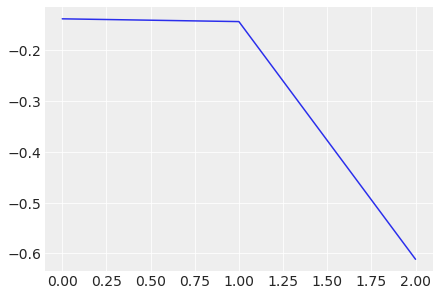

In [3]:
plt.plot(x)
plt.show()

## Gaussian distribution

A variable, $X$, follows a Gaussian distribution if its
values are dictated by the following expression:

$$p(x|\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}}e^{\frac{-(x - \mu)^2}{2\sigma^2}}$$

This is the probability density function for the Normal distribution.



[]

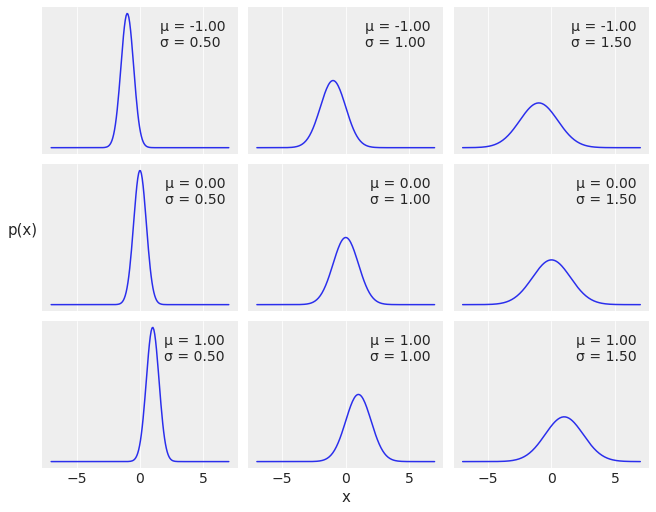

In [4]:
mu_params = [-1, 0, 1]
sd_params = [0.5, 1, 1.5]

x = np.linspace(-7, 7, 200)
_, ax = plt.subplots(len(mu_params), len(sd_params), sharex=True, sharey=True, figsize=(9, 7), constrained_layout=True)
for i in range(3):
    for j in range(3):
        mu = mu_params[i]
        sd = sd_params[j]
        y = stats.norm(mu, sd).pdf(x)
        ax[i,j].plot(x, y)
        ax[i,j].plot([], label="μ = {:3.2f}\nσ = {:3.2f}".format(mu, sd), alpha=0)
        ax[i,j].legend(loc=1)
ax[2,1].set_xlabel('x')
ax[1,0].set_ylabel('p(x)', rotation=0, labelpad=20)
ax[1,0].set_yticks([])

There are two types of random variables: continuous and discrete. Continuous variables
can take any value from some interval (we can use Python floats to represent them), and
discrete variables can take only certain values (we can use Python integers to represent
them). The Normal distribution is a continuous distribution.

##Binomial distribution

**Choosing the likelihood**

Let's assume that only two outcomes are possible—heads or tails—and let's also assume that a coin toss does not affect other tosses, that is, we are assuming coin tosses are independent of each other.

Given these assumptions a good candidate for the likelihood is the binomial distribution:

$$p(y|\theta,N) = \frac{N!}{y!(N-y)!}\theta^y(1-\theta)^{N-y}$$

This is a discrete distribution returning the probability of getting $y$ heads (or in general, successes) out of $N$ coin tosses (or in general, trials or experiments) given a fixed value of $\theta$:

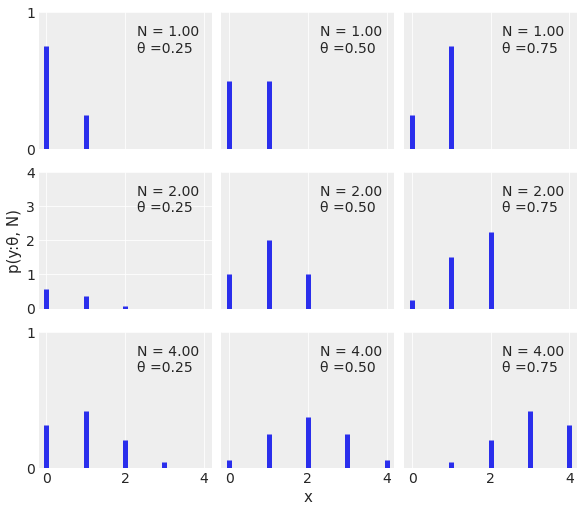

In [5]:
n_params = [1, 2, 4]           # Number of trials
p_params = [0.25, 0.5, 0.75]   # Probability of success

x = np.arange(0, max(n_params) + 1)
f, ax = plt.subplots(len(n_params), len(p_params), sharex=True, sharey=True, figsize=(8, 7), constrained_layout=True)
for i in range(len(n_params)):
    for j in range(len(p_params)):
        n = n_params[i]
        p = p_params[j]

        y = stats.binom(n=n, p=p).pmf(x)

        ax[i,j].vlines(x, 0, y, colors='C0', lw=5)
        ax[i,j].set_ylim(0, 1)
        ax[i,j].plot(0, 0, label="N = {:3.2f}\nθ ={:3.2f}".format(n, p), alpha=0)
        ax[i,j].legend()
ax[2,1].set_xlabel('x')
ax[1,0].set_ylabel('p(y:θ, N)')
ax[1,0].set_yticks(x)

The binomial distribution is a reasonable choice for the likelihood. We can see that $\theta$ indicates how likely it is to obtain a head when tossing a coin (this is easier to see when $N=1$ , but is valid for any value of $N$)—just compare the value of $\theta$ with the height of the bar for $y=1$(heads).

OK, if we know the value of $\theta$, the binomial distribution will tell us the expected distribution of heads. The only problem is that we do not know $\theta$! 

But do not despair; in Bayesian statistics, every time we do not know the value of a parameter, we put a prior on it, so let's move on and choose a prior for $\theta$.

##Beta distribution

**Choosing the prior**

As a prior, we will use a beta distribution, which is a very common distribution in Bayesian statistics and looks as follows:

$$p(\theta) = \frac{\tau(\alpha + \beta)}{\tau(\alpha)\tau(\beta)}\theta^{\alpha - 1}(1-\theta)^{\beta-1}$$

The first term is a normalizing constant that ensures the distribution integrates to 1.




Text(0, 0.5, '$p(\\theta)$')

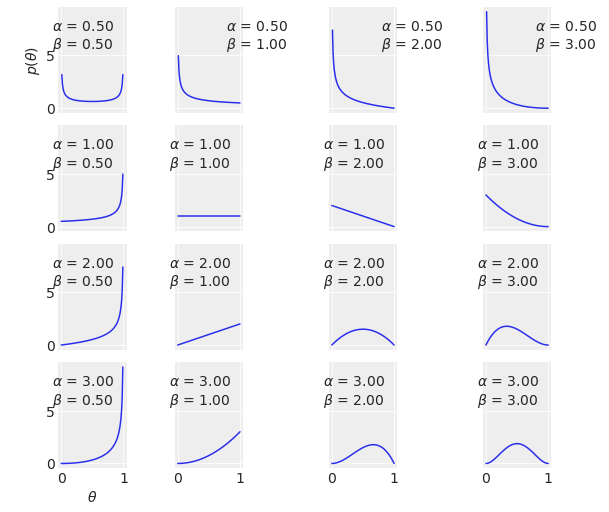

In [10]:
n_params = [0.5, 1, 2, 3]     # Number of trials

x = np.linspace(0, 1, 100)
f, ax = plt.subplots(len(n_params), len(n_params), sharex=True, sharey=True, figsize=(8, 7), constrained_layout=True)
for i in range(4):
    for j in range(4):
        n = n_params[i]
        p = n_params[j]

        y = stats.beta(n, p).pdf(x)

        ax[i,j].plot(x, y)
        ax[i,j].plot(0, 0, label="$\\alpha$ = {:3.2f}\n$\\beta$ = {:3.2f}".format(n, p), alpha=0)
        ax[i,j].legend()
ax[3,0].set_xlabel('$\\theta$', fontsize=14)
ax[0,0].set_ylabel('$p(\\theta)$', fontsize=14)

##Posterior distribution

**Computing and plotting the posterior**

Now we will use Python to compute and plot the posterior distribution.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


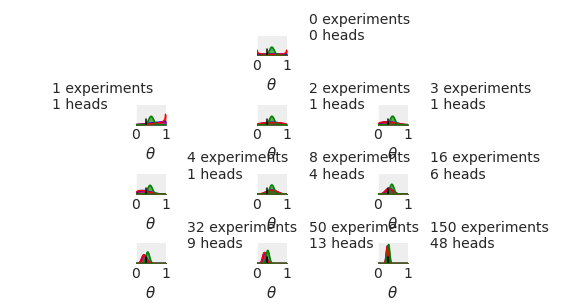

In [19]:
theta_real = 0.35
trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
data = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]

beta_params = [(1, 1), (0.5, 0.5), (20, 20)]
dist = stats.beta
x = np.linspace(0, 1, 100)

for idx, N in enumerate(trials):
    if idx == 0:
        plt.subplot(4,3, 2)
    else:
        plt.subplot(4,3, idx+3)
    y = data[idx]
    for (a_prior, b_prior), c in zip(beta_params, ('b', 'r', 'g')):
        p_theta_given_y = dist.pdf(x, a_prior + y, b_prior + N - y)
        plt.plot(x, p_theta_given_y, c)
        plt.fill_between(x, 0, p_theta_given_y, color=c, alpha=0.6)

    plt.axvline(theta_real, ymax=0.3, color='k')
    plt.plot(0, 0, label="{:d} experiments\n{:d} heads".format(N, y), alpha=0)
    plt.xlim(0,1)
    plt.ylim(0,12)
    plt.xlabel(r"$\theta$") 
    plt.legend()
    plt.gca().axes.get_yaxis().set_visible(False)
plt.tight_layout()
plt.show()